In [22]:
import pandas as pd
import scipy.stats as stats

# Load dataset
data = pd.read_csv('sample_data/student_scores.csv')

# Create a dictionary to store outputs for Excel
output_data = {}

# Task 1.1: Hypothesis Testing
math_scores = data['Math']
population_mean = 75
t_statistic, p_value = stats.ttest_1samp(math_scores, population_mean)
print(f"T-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

## Given that the p-value (0.5048) is greater than the significance level
## (0.05), we fail to reject the null hypothesis. This means that there is not
## enough evidence to conclude that the mean Math score is significantly
## different from 75 at the 95% confidence level.

T-statistic: -0.6719, p-value: 0.5048


In [23]:
import numpy as np

# Task 1.2: Confidence Intervals
confidence_level = 0.95
mean_math_score = np.mean(math_scores)
standard_error = stats.sem(math_scores)
confidence_interval = stats.t.interval(confidence_level, len(math_scores)-1, loc=mean_math_score, scale=standard_error)
print(f"95% confidence interval for Math Scores: {confidence_interval}")

## We are 95% confident that the true mean Math
## score for the population lies between approximately 69.73 and 77.63.
## This means that if we were to take many samples from this
## population and calculate a confidence interval for each sample, 95%
## of those intervals would contain the true population mean.

# Store results
output_data['Hypothesis Testing'] = pd.DataFrame({
    'Metric': ['T-statistic', 'P-value', '95% CI Lower', '95% CI Upper'],
    'Value': [t_statistic, p_value, confidence_interval[0], confidence_interval[1]]
})

95% confidence interval for Math Scores: (69.7322536656789, 77.62774633432112)


In [24]:
# Task 1.3: Statistical Significance
alpha = 0.05
if p_value < alpha:
    print("The result is statistically significant. Reject the null hypothesis.")
else:
    print("The result is not statistically significant. Fail to reject the null hypothesis.")

The result is not statistically significant. Fail to reject the null hypothesis.



Simple Linear Regression:
Slope: -0.0251, Intercept: 76.2912
R-squared: 0.0077, Mean Squared Error: 115.3467


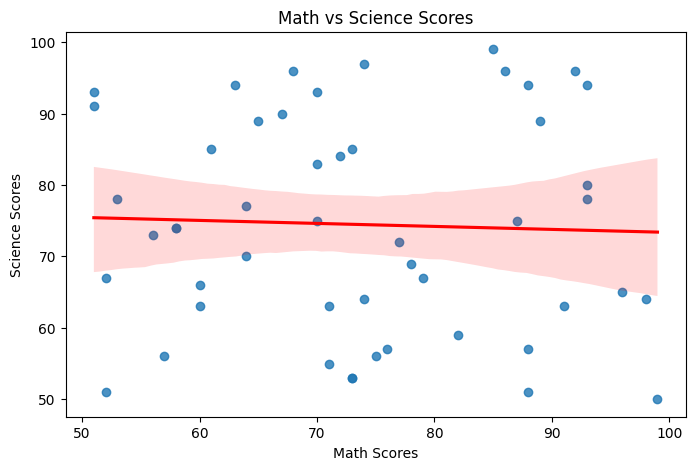

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2.1 Simple Linear Regression (Math -> Science)
X = data[['Math']]
y = data['Science']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nSimple Linear Regression:\nSlope: {slope:.4f}, Intercept: {intercept:.4f}")
print(f"R-squared: {r2:.4f}, Mean Squared Error: {mse:.4f}")

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x=data['Math'], y=y, line_kws={"color": "red"})
plt.title("Math vs Science Scores")
plt.xlabel("Math Scores")
plt.ylabel("Science Scores")
plt.show()

## 1. Since R-squared is close to 0, Math scores are not a good predictor of
## Science scores in this dataset.

## 2. The negative slope is unusual, as we might expect a positive correlation
## between Math and Science scores. It suggests a weak or no relationship.

## 3. A better predictive model may require additional variables (e.g.,
## English scores) or different modeling approaches.

# Store results
output_data['Simple Regression'] = pd.DataFrame({
    'Metric': ['Slope', 'Intercept', 'R-squared', 'MSE'],
    'Value': [slope, intercept, r2, mse]
})


Multiple Linear Regression:
R-squared: 0.0077, Mean Squared Error: 115.3466


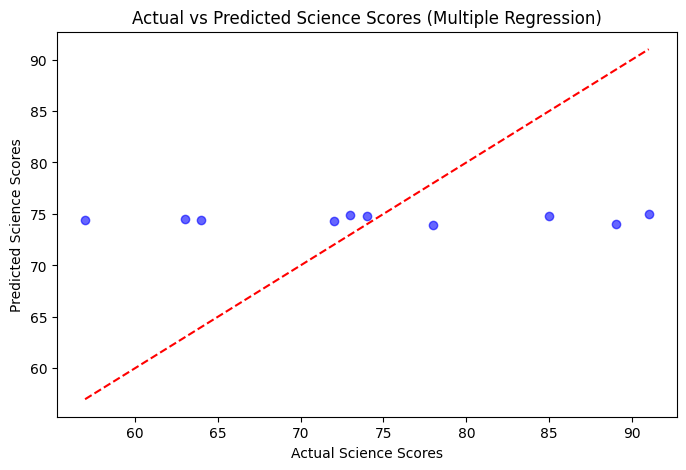

In [18]:
# 2.2 Multiple Linear Regression (Math, English -> Science)
X_multi = data[['Math', 'English']]
y_multi = data['Science']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_m = multi_model.predict(X_test_m)

# Metrics
r2_multi = r2_score(y_test_m, y_pred_m)
mse_multi = mean_squared_error(y_test_m, y_pred_m)
print(f"\nMultiple Linear Regression:\nR-squared: {r2_multi:.4f}, Mean Squared Error: {mse_multi:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_m, y_pred_m, alpha=0.6, color='blue')
plt.plot([min(y_test_m), max(y_test_m)], [min(y_test_m), max(y_test_m)], linestyle='--', color='red')
plt.xlabel("Actual Science Scores")
plt.ylabel("Predicted Science Scores")
plt.title("Actual vs Predicted Science Scores (Multiple Regression)")
plt.show()

# Store results
output_data['Multiple Regression'] = pd.DataFrame({
    'Metric': ['R-squared', 'MSE'],
    'Value': [r2_multi, mse_multi]
})

In [26]:
# 2.3 Model Evaluation
print("\nModel Comparison:")
print(f"Simple Linear Regression R-squared: {r2:.8f}, MSE: {mse:.4f}")
print(f"Multiple Linear Regression R-squared: {r2_multi:.8f}, MSE: {mse_multi:.4f}")
if r2_multi > r2:
    print("Multiple Linear Regression performs better.")
else:
    print("Simple Linear Regression performs better.")


Model Comparison:
Simple Linear Regression R-squared: 0.00768477, MSE: 115.3467
Multiple Linear Regression R-squared: 0.00768556, MSE: 115.3466
Multiple Linear Regression performs better.


In [27]:
from google.colab import files  # For downloading in Colab

### Model Comparison ###
comparison_df = pd.DataFrame({
    'Model': ['Simple Regression', 'Multiple Regression'],
    'R-squared': [r2, r2_multi],
    'MSE': [mse, mse_multi]
})
output_data['Model Comparison'] = comparison_df

### Save to Excel ###
output_filename = 'Regression_Analysis_Output.xlsx'
with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
    for sheet_name, data in output_data.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Download the file in Colab
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



In a conclusion, the multiple regression model does not provide much improvement over simple regression, but because adding predictors never decreases mutiple R, we see a slightly larger value.

Final Recommendation

*   Since the difference in performance is negligible, we should explore other models or additional features rather than relying on these two models.
*   Investigate whether other variables (e.g., attendance, study time) better explain Science scores.
*   Test non-linear models if relationships are not purely linear.

